## Import Packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBRegressor
import pickle

## Import dataset

In [2]:
df = pd.read_csv(r"/home/rapidcentre-desk10/Downloads/DATA_ANALYSIS/diamonds.csv", index_col=0)
df.rename(columns={"x":"Length (mm)", "y": "Width (mm)", "z": "Depth (mm)"}, inplace = True)

In [3]:
df

,carat,cut,color,clarity,depth,table,price,Length (mm),Width (mm),Depth (mm)
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Understanding the Data

In [4]:
df.describe()

,carat,depth,table,price,Length (mm),Width (mm),Depth (mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut          53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   depth        53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   Length (mm)  53940 non-null  float64
 8   Width (mm)   53940 non-null  float64
 9   Depth (mm)   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### Finding Correlation

/tmp/ipykernel_19972/1876167299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

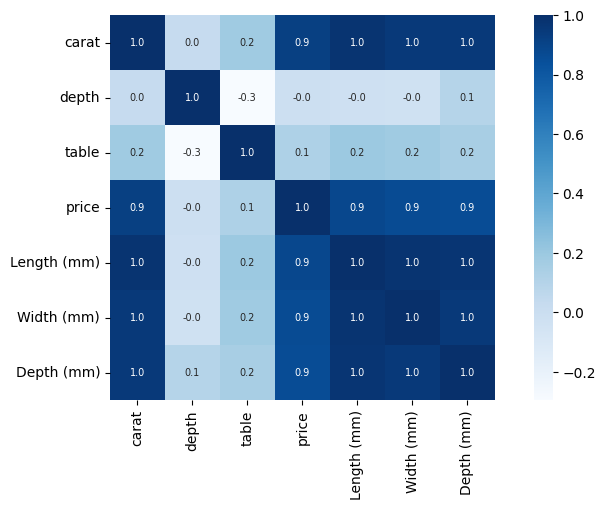

In [6]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', cmap = "Blues", annot = True, annot_kws={"size": 7})

## Data preprocessing

In [7]:
transformation = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(sparse_output = False), ["cut"]),
    ("tnf2", OneHotEncoder(sparse_output = False), ["color"]),
    ("tnf3", OneHotEncoder(sparse_output = False), ["clarity"])
], remainder="passthrough")

In [8]:
encoded_data = transformation.fit_transform(df)

In [9]:
encoded_data

array([[0.  , 0.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.  , 0.  , 0.  , ..., 3.89, 3.84, 2.31],
       [0.  , 1.  , 0.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.  , 0.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.  , 0.  , 0.  , ..., 6.15, 6.12, 3.74],
       [0.  , 0.  , 1.  , ..., 5.83, 5.87, 3.64]])

In [10]:
new_df = pd.DataFrame(encoded_data, columns = transformation.get_feature_names_out())
new_df

,tnf1__cut_Fair,tnf1__cut_Good,tnf1__cut_Ideal,tnf1__cut_Premium,tnf1__cut_Very Good,tnf2__color_D,tnf2__color_E,tnf2__color_F,tnf2__color_G,tnf2__color_H,...,tnf3__clarity_VS2,tnf3__clarity_VVS1,tnf3__clarity_VVS2,remainder__carat,remainder__depth,remainder__table,remainder__price,remainder__Length (mm),remainder__Width (mm),remainder__Depth (mm)
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


## Creating Regression Model

In [11]:
x = new_df.drop(["remainder__price"], axis = 1)
y = new_df["remainder__price"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((53940, 26), (53940,), (43152, 26), (10788, 26), (43152,), (10788,))

In [14]:
regressor = XGBRegressor()

In [15]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
training_data_prediction = regressor.predict(x_train)

In [17]:
test_data_prediction = regressor.predict(x_test)

## Model Evaluation

In [18]:
score1 = metrics.r2_score(y_train, training_data_prediction)
score2 = metrics.mean_squared_error(y_train, training_data_prediction)
print("R-Squared Error:", score1)
print("Mean Squared Error:", score2)

R-Squared Error: 0.9905145965388779
Mean Squared Error: 151005.14498231863


In [19]:
score1 = metrics.r2_score(y_test, test_data_prediction)
score2 = metrics.mean_squared_error(y_test, test_data_prediction)
print("R-Squared Error:", score1)
print("Mean Squared Error:", score2)

R-Squared Error: 0.9810080519312508
Mean Squared Error: 301911.6074604994


## Let's Deploy

In [20]:
unseen_input_data = np.array(new_df.loc[6]).reshape(1, -1)
unseen_input_data

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 2.40e-01, 6.23e+01, 5.70e+01, 3.36e+02,
        3.95e+00, 3.98e+00, 2.47e+00]])

In [29]:
hi = pd.DataFrame(unseen_input_data, columns=transformation.get_feature_names_out())

In [22]:
hi.drop(["remainder__price"], axis = 1, inplace = True)

In [23]:
regressor.predict(hi)

array([356.31137], dtype=float32)

## Pickling the model for deployment

In [28]:
pickle.dump(regressor, open("regmodel.pkl", "wb"))
pickled_model = pickle.load(open("regmodel.pkl", "rb"))
pickled_model.predict(hi)

array([356.31137], dtype=float32)